C:\Users\劳煜翔\AppData\Local\Temp\ipykernel_11300\755704433.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs, ys, zs, c=colors, s=50, cmap='jet')


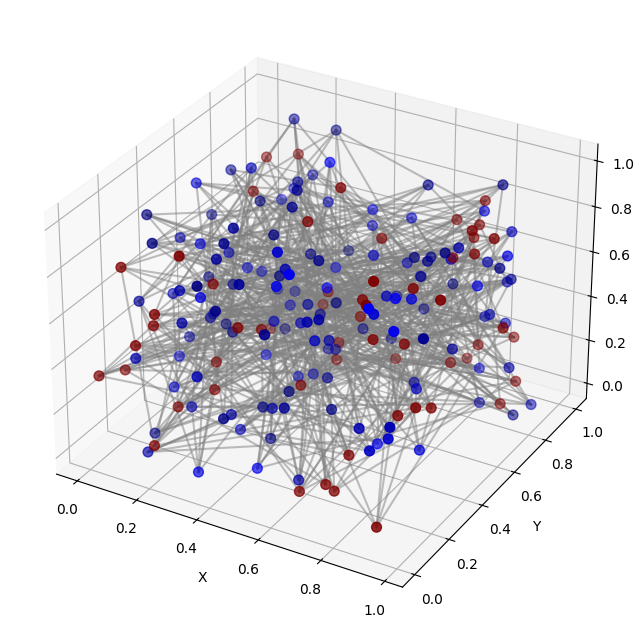

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义Izhikevich模型
def izhikevich(V, u, I, a=0.02, b=0.2, c=-65, d=8):
    """
    Izhikevich神经元模型的动态方程
    V: 膜电位
    u: 恢复变量
    I: 外部输入
    a, b, c, d: Izhikevich模型的参数
    """
    dV = 0.04 * V**2 + 5 * V + 140 - u + I  # 膜电位的更新方程
    du = a * (b * V - u)  # 恢复变量的更新方程
    return V + dV, u + du

# 创建小世界网络
N = 200  # 节点数量
k = 6    # 每个节点连接的邻居数量
p = 0.1  # 重连概率
G = nx.watts_strogatz_graph(N, k, p)

# 为每个节点分配随机的三维坐标
pos = {i: np.random.rand(3) for i in range(N)}

# 初始化膜电位和恢复变量，确保使用浮动类型
V = np.full(N, -65.0, dtype=np.float64)  # 初始膜电位为-65 mV
u = np.full(N, 0.0, dtype=np.float64)    # 初始恢复变量为0
I = np.random.randn(N) * 10  # 随机外部输入

# 进行模拟，计算每个节点的膜电位
T = 500  # 模拟的时间步数
for t in range(T):
    for i in range(N):
        V[i], u[i] = izhikevich(V[i], u[i], I[i])
        V[i] = np.clip(V[i], -80, 80)  # 限制膜电位的范围，避免溢出

# 计算每个节点的颜色（基于膜电位的值）
norm = plt.Normalize(V.min(), V.max())
colors = plt.cm.jet(norm(V))

# 绘制三维网络图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 提取节点的三维坐标
xs, ys, zs = zip(*[pos[i] for i in range(N)])

# 绘制节点，颜色基于膜电位
ax.scatter(xs, ys, zs, c=colors, s=50, cmap='jet')

# 绘制网络边
for i, j in G.edges():
    x_vals = [pos[i][0], pos[j][0]]
    y_vals = [pos[i][1], pos[j][1]]
    z_vals = [pos[i][2], pos[j][2]]
    ax.plot(x_vals, y_vals, z_vals, color='gray', alpha=0.5)

# 设置图的标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 显示图形
plt.show()

